<a href="https://colab.research.google.com/github/areebkhan47/sentiment_analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movie.csv to movie.csv


In [ ]:
#file_path = '/content/drive/MyDrive/amazon_reviews_dataset.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import TFBertForSequenceClassification

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('movie.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df = df[['text', 'label']]
df.dropna(inplace=True)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z']", " ", text)  # remove numbers & symbols
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df['text'] = df['text'].apply(clean_text)

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')


In [ ]:
df['text'] = df['text'].str.lower()


In [ ]:
X = pad_sequences(sequences, maxlen=100)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(Bidirectional(LSTM(32, return_sequences=False)))  # Bidirectional LSTM
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 95ms/step - accuracy: 0.7069 - loss: 0.5319 - val_accuracy: 0.8479 - val_loss: 0.3474
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.8912 - loss: 0.2771 - val_accuracy: 0.8530 - val_loss: 0.3499
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.9178 - loss: 0.2115 - val_accuracy: 0.8401 - val_loss: 0.4318


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}, test loss : {loss}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8197 - loss: 1.1796
Test Accuracy: 0.8242, test loss : 1.1351250410079956


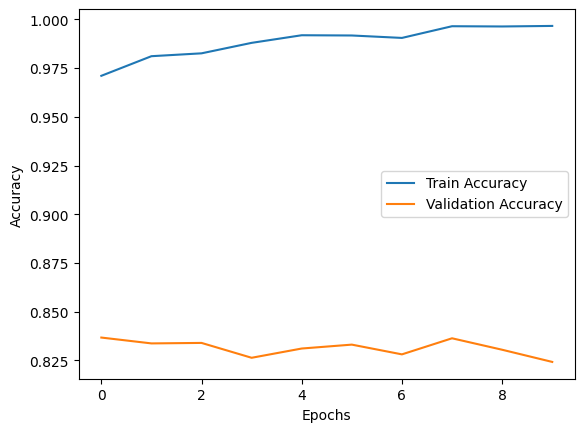

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



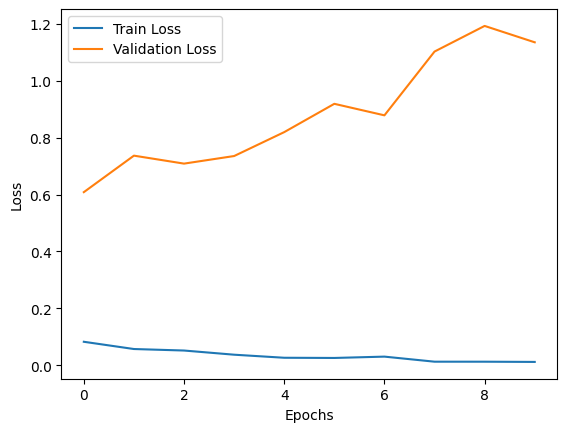

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(df['label'].value_counts())     # Are classes balanced?
print(df['text'].apply(len).describe())   # Are texts long enough?


label
0    20019
1    19981
Name: count, dtype: int64
count    40000.000000
mean      1262.047875
std        953.120396
min         30.000000
25%        673.000000
50%        935.000000
75%       1538.250000
max      13377.000000
Name: text, dtype: float64
